In [2]:
%run ../config/initialize.ipynb

import json
import shutil

In [3]:
sys.path.append('/Users/joshplotkin/Dropbox/data_science/modeling-football-outcomes/config/')
from mpl_style import *

In [123]:
!ls /Users/joshplotkin/Dropbox/data_science/modeling-football-outcomes/models/000007

config.json   optimizer.pkl results.csv


In [124]:
bo = pd.read_excel('/Users/joshplotkin/Dropbox/data_science/modeling-football-outcomes/06_model_development/params_0525.xlsx', header=None)

In [125]:
def parse_xls(v):
    cols = v.split('|')
    return [c.strip() for c in cols if c.strip() != '']
    
bayesopt = pd.DataFrame.from_dict({ k: parse_xls(v) for k,v in bo.to_dict()[0].items() }, orient='index')

In [126]:
sk = pd.read_csv('/Users/joshplotkin/Dropbox/data_science/modeling-football-outcomes/models/000007/results.csv', index_col='Unnamed: 0')

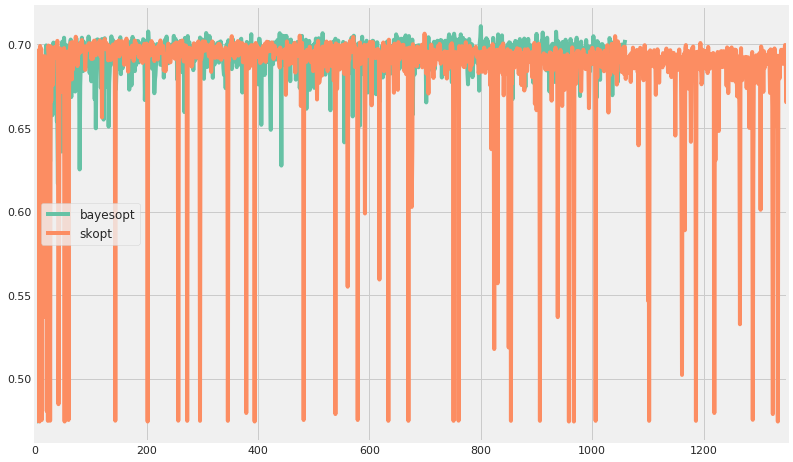

In [127]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

b = bayesopt[[1]].rename(columns={1:'bayesopt'}).astype(float)
s = sk[['auc']].rename(columns={'auc':'skopt'})

b.plot(kind='line', ax=ax)
s.plot(kind='line', ax=ax)

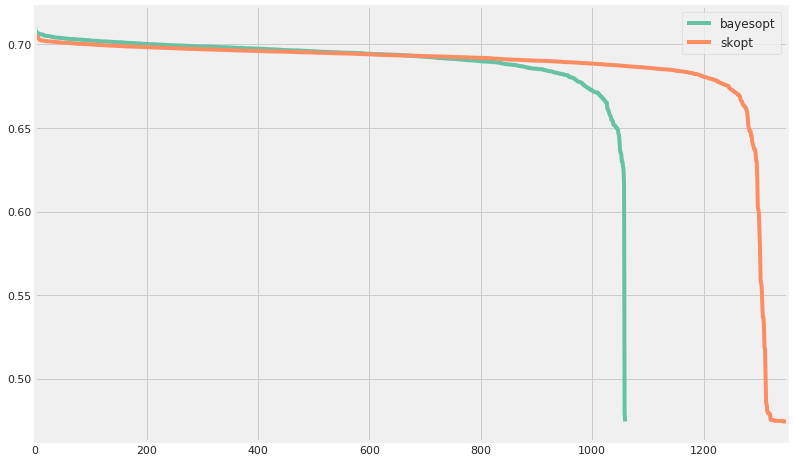

In [128]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

b.sort_values(by='bayesopt', ascending=False).reset_index(drop=True).plot(kind='line', ax=ax)
s.sort_values(by='skopt', ascending=False).reset_index(drop=True).plot(kind='line', ax=ax)

In [129]:
b.sort_values(by='bayesopt', ascending=False).reset_index(drop=True).merge(
    s.sort_values(by='skopt', ascending=False).reset_index(drop=True),
    left_index=True,
    right_index=True
).head(10)

,bayesopt,skopt
0,0.7109,0.706427
1,0.7077,0.705234
2,0.7076,0.704943
3,0.7071,0.704915
4,0.7068,0.704590
5,0.7067,0.704445
6,0.7067,0.703466
7,0.7064,0.703232
8,0.7063,0.702838
9,0.7061,0.702610


In [130]:
# trial_dir = '/Users/joshplotkin/Dropbox/data_science/modeling-football-outcomes/models/000006'
trial_dir = '/Users/joshplotkin/Dropbox/data_science/modeling-football-outcomes/models/000011'

In [131]:
!ls {trial_dir}

config.json   optimizer.pkl results.csv


In [132]:
sk2 = pd.read_csv(f'{trial_dir}/results.csv', index_col='Unnamed: 0')

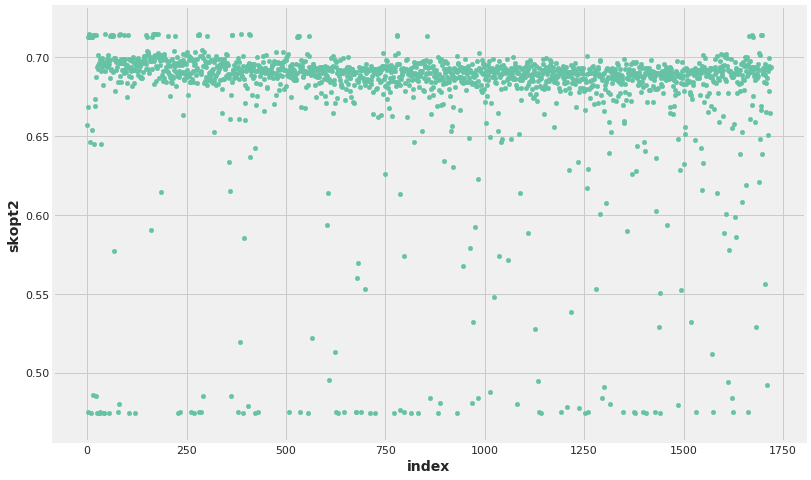

In [133]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

s2 = sk2[['auc']].rename(columns={'auc':'skopt2'})
s2.reset_index(drop=False).plot(kind='scatter', x='index', y='skopt2', ax=ax)

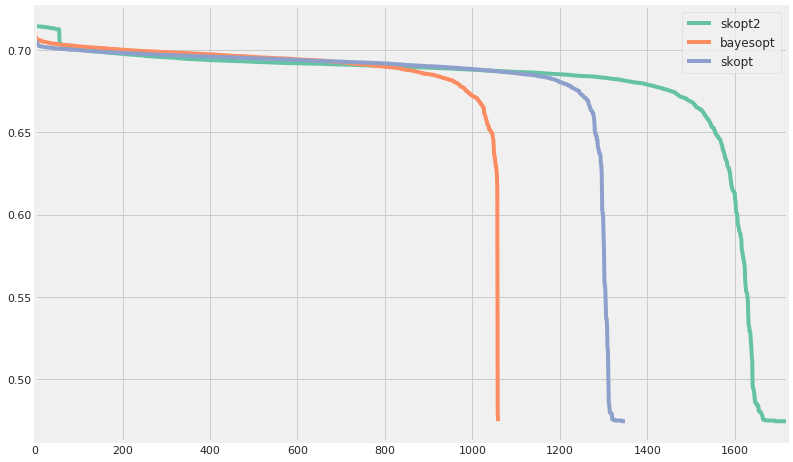

In [134]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

s2.sort_values(by='skopt2', ascending=False).reset_index(drop=True).plot(kind='line', ax=ax)
b.sort_values(by='bayesopt', ascending=False).reset_index(drop=True).plot(kind='line', ax=ax)
s.sort_values(by='skopt', ascending=False).reset_index(drop=True).plot(kind='line', ax=ax)

In [135]:
b.sort_values(by='bayesopt', ascending=False).reset_index(drop=True).merge(
    s.sort_values(by='skopt', ascending=False).reset_index(drop=True),
    left_index=True,
    right_index=True
).merge(
    s2.sort_values(by='skopt2', ascending=False).reset_index(drop=True),
    left_index=True,
    right_index=True
).head(10)

,bayesopt,skopt,skopt2
0,0.7109,0.706427,0.714587
1,0.7077,0.705234,0.714536
2,0.7076,0.704943,0.714528
3,0.7071,0.704915,0.714528
4,0.7068,0.704590,0.714528
5,0.7067,0.704445,0.714519
6,0.7067,0.703466,0.714519
7,0.7064,0.703232,0.714514
8,0.7063,0.702838,0.714514
9,0.7061,0.702610,0.714468


In [136]:
import pickle
opt = pickle.load(open(f'{trial_dir}/optimizer.pkl','rb'))

EOFError: Ran out of input

In [ ]:
opt.acq_func

In [ ]:
for o in dir(opt):
    if not o.startswith('__'):
        print(o)
        print('--------')
        if o in ['Xi','models','yi']:
            print(len(eval(f'opt.{o}')))
        else:
            eval(f'opt.{o}')
        print('====================')
        print('\n\n\n\n')

In [ ]:
sk2.sort_values(by='auc', ascending=False)[['alpha','lambda','booster','auc']]

450

,feature_selection
0,0.717758
1,0.717751
2,0.717704
3,0.717635
4,0.717590
5,0.717577
6,0.717570
7,0.717555
8,0.717544
9,0.717542


,prop_included
rankings___v__dave_or_wtddvoa,0.953333
rankings___v__offensedvoa,0.935556
rankings___h__dave_or_wtddvoa,0.924444
rankings___v__defensedvoa,0.873333
rankings___h__s_t_dvoa,0.784444
travel___v_days_since_last_game,0.740000
rankings___h__offensedvoa,0.628889
travel___v_tz_change_last_10_days,0.571111
travel___v_body_clock_from_last_wk,0.551111
travel___h_same_stadium_last_game,0.544444


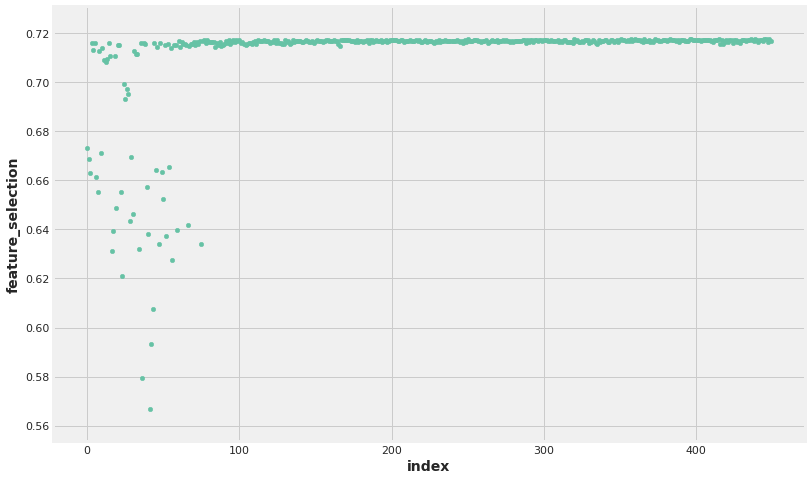

In [151]:
trial_dir = '/Users/joshplotkin/Dropbox/data_science/modeling-football-outcomes/models/000013'
feature_selection = pd.read_csv(f'{trial_dir}/results.csv', index_col='Unnamed: 0')
feature_selection.shape[0]

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

fs = feature_selection[['auc']].rename(columns={'auc':'feature_selection'})
fs.reset_index(drop=False).plot(kind='scatter', x='index', y='feature_selection', ax=ax)

fs.sort_values(by='feature_selection', ascending=False).reset_index(drop=True).head(10)

feature_ind = {}
for f in [f_ for f_ in feature_selection.iloc[-100:].columns if f_ != 'auc']:
    feature_ind[f] = { 'prop_included': feature_selection[f].mean() }
pd.DataFrame.from_dict(feature_ind, orient='index')\
    .sort_values(by='prop_included', ascending=False)

1510

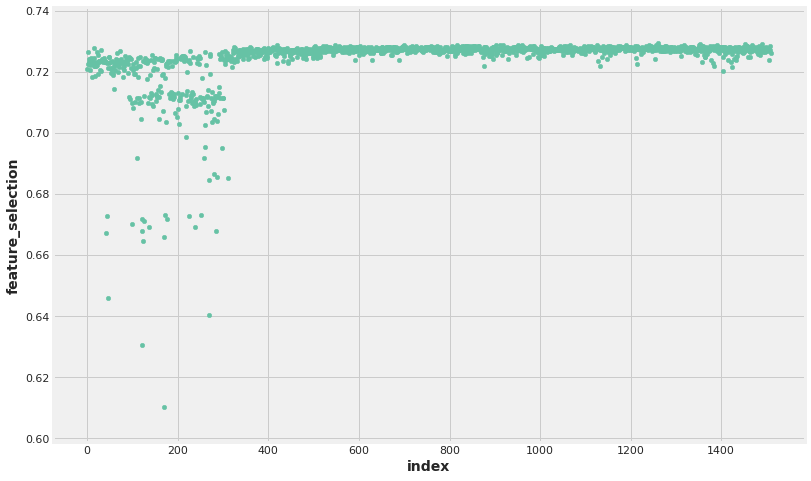

,feature_selection
0,0.729471
1,0.729107
2,0.729006
3,0.728950
4,0.728917
5,0.728896
6,0.728864
7,0.728863
8,0.728836
9,0.728819


,prop_included
line___h_ml,0.862914
rankings___v__defensedvoa,0.861589
rankings___h__totaldvoa,0.803974
weather___humidity_pct,0.801987
rankings___v__dave_or_wtddvoa,0.614570
rankings___h__off_rank,0.569536
team_history___v_close_wr_ytd,0.543709
matchup___is_same_division,0.541722
line___open_ou,0.535099
team_history___v_open_wr_past_2_seasons,0.530464


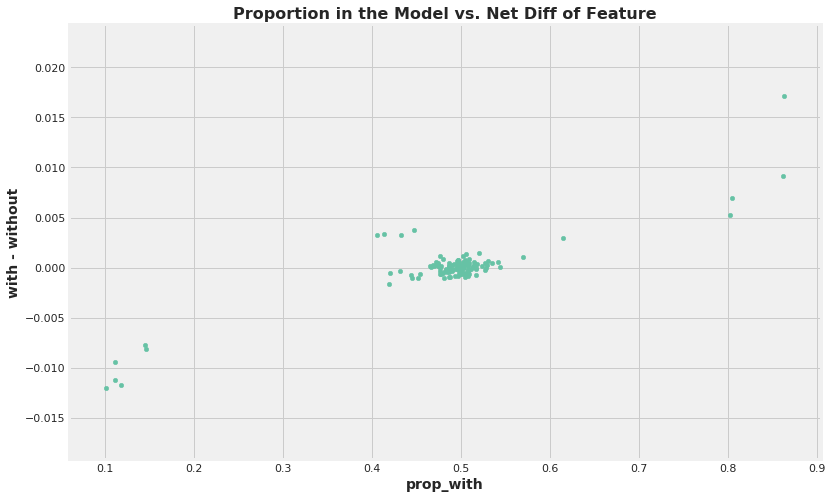

,without,with,with - without,prop_with
line___h_ml,0.709710,0.726893,0.017183,0.862914
rankings___v__defensedvoa,0.716667,0.725801,0.009135,0.861589
rankings___h__totaldvoa,0.718945,0.725901,0.006956,0.803974
weather___humidity_pct,0.720358,0.725569,0.005212,0.801987
line___h_pfr_line,0.722848,0.726626,0.003778,0.447020
line___h_close_line,0.723146,0.726507,0.003362,0.413907
line___h_open_line,0.723113,0.726406,0.003293,0.432450
line___v_ml,0.723228,0.726458,0.003229,0.405298
rankings___v__dave_or_wtddvoa,0.722717,0.725679,0.002962,0.614570
rankings___v__totaldvoa,0.723791,0.725225,0.001434,0.520530


In [2]:
trial_dir = '/Users/joshplotkin/Dropbox/data_science/modeling-football-outcomes/models/000014'
feature_selection = pd.read_csv(f'{trial_dir}/results.csv', index_col='Unnamed: 0')
feature_selection.shape[0]

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

fs = feature_selection[['auc']].rename(columns={'auc':'feature_selection'})
fs.reset_index(drop=False).plot(kind='scatter', x='index', y='feature_selection', ax=ax)
plt.show()

fs.sort_values(by='feature_selection', ascending=False).reset_index(drop=True).head(10)

feature_ind = {}
for f in [f_ for f_ in feature_selection.iloc[-100:].columns if f_ != 'auc']:
    feature_ind[f] = { 'prop_included': feature_selection[f].mean() }
pd.DataFrame.from_dict(feature_ind, orient='index')\
    .sort_values(by='prop_included', ascending=False)

diffs = {}
for c in [f for f in feature_selection if f != 'auc']:
    aggs = feature_selection[[c, 'auc']].groupby(c)['auc'].mean()
    prop = feature_selection[feature_selection[c] == 1].shape[0] / feature_selection.shape[0]
    diffs[c] = { 'without': aggs[0], 'with': aggs[1], 
                'with - without': aggs[1]-aggs[0], 'prop_with': prop }
    
diffs_df = pd.DataFrame.from_dict(diffs, orient='index')\
                .sort_values(by='with - without', ascending=False)

diffs_df.plot(kind='scatter', x='prop_with', y='with - without',
             title='Proportion in the Model vs. Net Diff of Feature',
             figsize=(12,8))
plt.show()

diffs_df.sort_values(by='with - without', ascending=False).head(10)

124

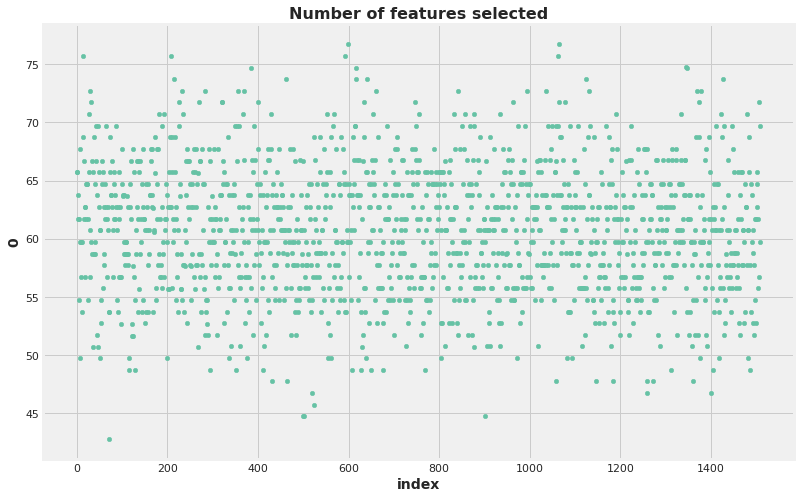

In [3]:
feature_selection.shape[1]
feature_selection.sum(axis=1).to_frame().reset_index(drop=False).plot(
    kind='scatter', x='index', y=0, figsize=(12,8), 
    title='Number of features selected'
)

In [22]:
import pickle
opt = pickle.load(open(f'{trial_dir}/optimizer.pkl','rb'))

2160

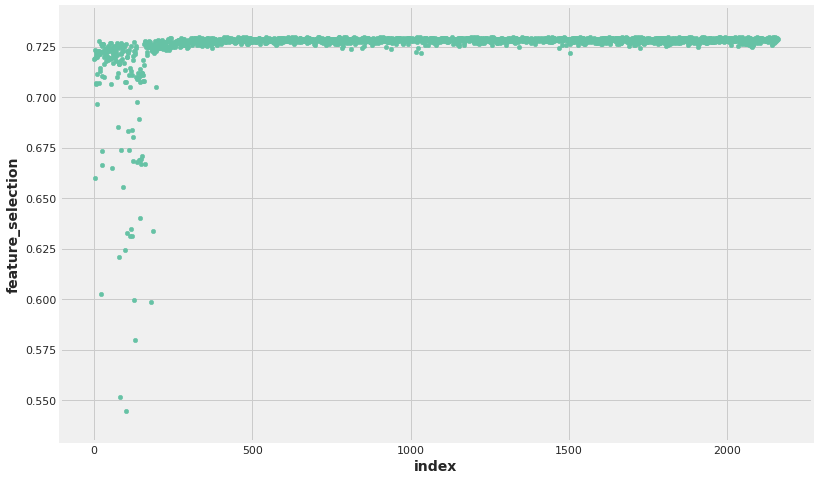

,feature_selection
0,0.729935
1,0.729892
2,0.729856
3,0.729830
4,0.729762
5,0.729754
6,0.729725
7,0.729720
8,0.729719
9,0.729718


,prop_included
line___h_ml,0.939815
rankings___v__defensedvoa,0.935648
rankings___h__dave_or_wtddvoa,0.929167
rankings___v__dave_or_wtddvoa,0.738426
weather___humidity_pct,0.462963
travel___v_days_since_last_game,0.337037
rankings___v__totaldvoa,0.296759
line___open_ou,0.279630
team_history___v_open_wr_past_5_games,0.277778
matchup___is_same_division,0.273148


,prop_included
rankings___h__def_rank,0.166667
rankings___h__defensedvoa,0.161111
rankings___h__s_t_rank,0.110185
travel___h_travel_from_last_game,0.096759
weather___temperature,0.078704
weather___wind_chill,0.070370
travel___v_dist_from_home,0.052778
travel___v_travel_from_last_10_days,0.048148
travel___v_travel_from_last_game_decay,0.037500
travel___v_travel_from_last_game,0.030093


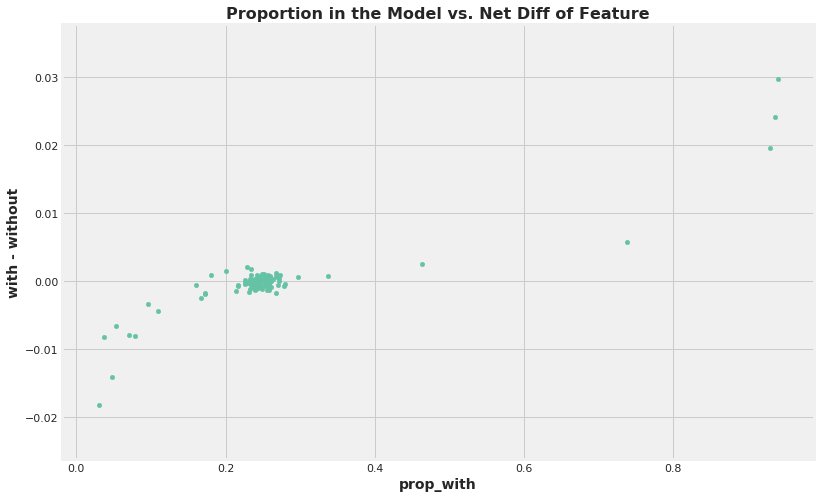

,without,with,with - without,prop_with
line___h_ml,0.698204,0.727967,0.029763,0.939815
rankings___v__defensedvoa,0.703555,0.727732,0.024177,0.935648
rankings___h__dave_or_wtddvoa,0.707976,0.727563,0.019587,0.929167
rankings___v__dave_or_wtddvoa,0.721920,0.727683,0.005764,0.738426
weather___humidity_pct,0.724980,0.727562,0.002582,0.462963
line___h_pfr_line,0.725707,0.727754,0.002047,0.229167
line___h_close_line,0.725753,0.727562,0.001809,0.233796
line___v_ml,0.725875,0.727370,0.001495,0.200926
home_field___v_visitor__close_wr_last_4_games,0.725859,0.727041,0.001182,0.268056
matchup___h_wr_past_2_seasons,0.725915,0.726950,0.001035,0.251852


,without,with,with - without,prop_with
rankings___v__s_t_dvoa,0.726490,0.724671,-0.001819,0.172685
rankings___h__def_rank,0.726587,0.724121,-0.002465,0.166667
travel___h_travel_from_last_game,0.726501,0.723139,-0.003362,0.096759
rankings___h__s_t_rank,0.726657,0.722292,-0.004365,0.110185
travel___v_dist_from_home,0.726523,0.719950,-0.006573,0.052778
weather___wind_chill,0.726736,0.718769,-0.007967,0.070370
weather___temperature,0.726815,0.718697,-0.008117,0.078704
travel___v_travel_from_last_game_decay,0.726483,0.718296,-0.008186,0.037500
travel___v_travel_from_last_10_days,0.726852,0.712810,-0.014042,0.048148
travel___v_travel_from_last_game,0.726722,0.708558,-0.018164,0.030093


124

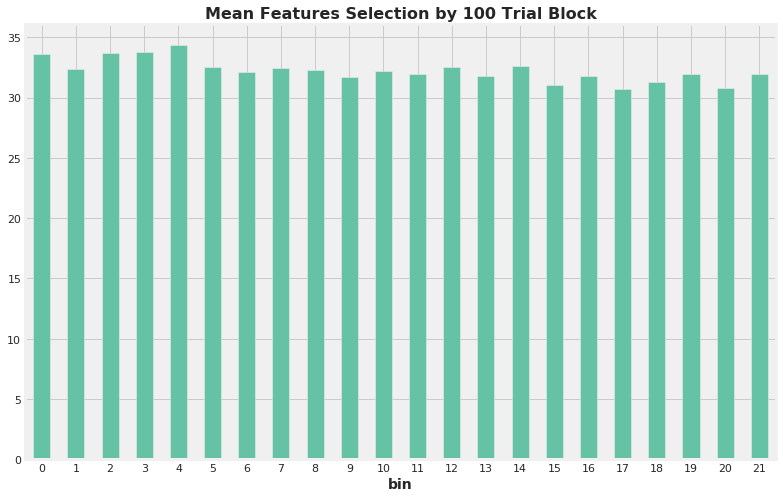

In [20]:
trial_dir = '/Users/joshplotkin/Dropbox/data_science/modeling-football-outcomes/models/000021'
feature_selection = pd.read_csv(f'{trial_dir}/results.csv', index_col='Unnamed: 0')
feature_selection.shape[0]

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

fs = feature_selection[['auc']].rename(columns={'auc':'feature_selection'})
fs.reset_index(drop=False).plot(kind='scatter', x='index', y='feature_selection', ax=ax)
plt.show()

fs.sort_values(by='feature_selection', ascending=False).reset_index(drop=True).head(10)

feature_ind = {}
for f in [f_ for f_ in feature_selection.iloc[-100:].columns if f_ != 'auc']:
    feature_ind[f] = { 'prop_included': feature_selection[f].mean() }
prop_incl = pd.DataFrame.from_dict(feature_ind, orient='index')\
    .sort_values(by='prop_included', ascending=False)
prop_incl.head(10)
prop_incl.tail(10)

diffs = {}
for c in [f for f in feature_selection if f != 'auc']:
    aggs = feature_selection[[c, 'auc']].groupby(c)['auc'].mean()
    prop = feature_selection[feature_selection[c] == 1].shape[0] / feature_selection.shape[0]
    diffs[c] = { 'without': aggs[0], 'with': aggs[1], 
                'with - without': aggs[1]-aggs[0], 'prop_with': prop }
    
diffs_df = pd.DataFrame.from_dict(diffs, orient='index')\
                .sort_values(by='with - without', ascending=False)

diffs_df.plot(kind='scatter', x='prop_with', y='with - without',
             title='Proportion in the Model vs. Net Diff of Feature',
             figsize=(12,8))
plt.show()

diffs_df.sort_values(by='with - without', ascending=False).head(10)
diffs_df.sort_values(by='with - without', ascending=False).tail(10)

feature_selection.shape[1]
from math import floor
num_feats = feature_selection.sum(axis=1).to_frame().reset_index()
num_feats['bin'] = num_feats['index'].apply(lambda x: floor(x/100))
num_feats.groupby('bin')[0].mean().plot(kind='bar', figsize=(12,8), rot=0,
                                       title='Mean Features Selection by 100 Trial Block')
